# Strassen's subcubic matrix multiplication

Straightforward matrix multiplication runs in $O(n^3)$ time, Strassen's Algorithm instead runs in $O(n^2\log n)$

Let $X$, $Y$ and $Z$ be $n$-square matrices, such that
$$XY = Z$$

Consider the 4 $n/2$-square block matrices of $X$ and $Y$ 
$$
X=
\begin{pmatrix} 
    A & B \\ 
    C & D
\end{pmatrix}
\quad
Y=
\begin{pmatrix}
    E & F \\ 
    G & H
\end{pmatrix}
$$

Strassens algorithm computes 7 products
$$
\begin{aligned}
P_1 = A(F - H) \\
P_2 = (A + B)H \\
P_3 = (C + D)E \\
P_4 = D(C - E) \\
P_5 = (A + D)(E + H) \\
P_6 = (B - D)(G + H) \\
P_7 = (A - C)(E + F)
\end{aligned}
$$

Then,

$$
Z=
\begin{pmatrix} 
    P_5 + P_4 - P_2 + P_6 & P_1 + P_2 \\ 
    P_3 + P_4 & P_1 + P_5 - P_3 - P_7
\end{pmatrix}
$$

# Closet Pair Problem

Given a set of points in the plane $\mathbb{R}^2$, find the pair closest to each. Can we do better than $O(n^2)$?

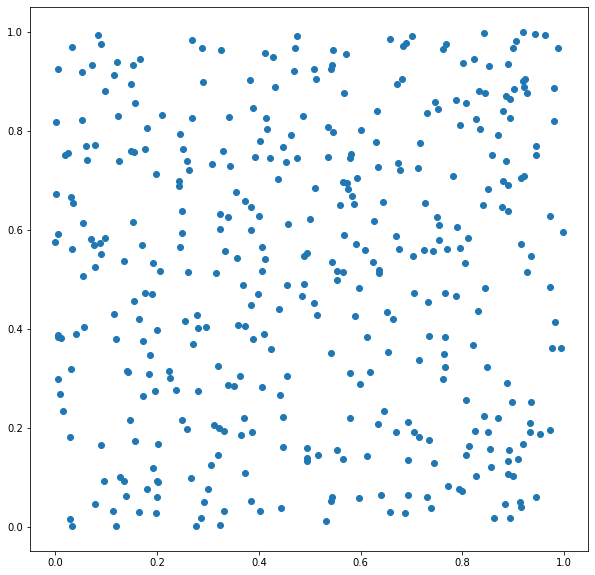

In [91]:
import numpy as np
import matplotlib.pyplot as plt

DIMENSION = 2
SIZE = 400
P = np.random.random((2, SIZE))

plt.figure(figsize=(10, 10))
plt.scatter(P[0,:], P[1,:])

def distance(p, q) -> float:
    return np.sqrt((P[0, p] - P[0, q])**2 + (P[1, p] - P[1, q]) **2)

# return a list of the indexes sorted through comparison in dataArr
def merge_sort(idxArr, dataArr) -> list[int]:
    if len(idxArr) == 1: 
        return idxArr
    
    half = len(idxArr) // 2
    
    lsorted = merge_sort(idxArr[:half], dataArr)
    rsorted = merge_sort(idxArr[half:], dataArr)

    i = 0
    j = 0
    outArr = []

    while i < len(lsorted) and j < len(rsorted):
        if dataArr[lsorted[i]] < dataArr[rsorted[j]]:
            outArr.append(lsorted[i])
            i += 1
        else:
            outArr.append(rsorted[j])
            j += 1
    else:
        if j < len(rsorted):
            outArr = np.concatenate((outArr, rsorted[j:]))
        elif i < len(lsorted):
            outArr = np.concatenate((outArr, lsorted[i:]))

    return outArr

We pre-process the points by sorting them, returning two arrays,
1. $P_x$ sorted by $x$ values
2. $P_y$ sorted by $y$ values

This is runs in $O(n\log n)$

In [92]:
seed_idx = np.arange(SIZE)
p_x = merge_sort(seed_idx, P[0,:])
p_y = merge_sort(seed_idx, P[1,:])

Divide and Conquer!
1. Split set into two halves by $x$ coordinates, left half $Q$, right half $R$
2. recurse into each half
3. deal with the case where the closest pair lies on the split boundary

In [96]:
def closestPair(x_sorted):
    
    # Base case runs in O(1) time since the input size is bounded above
    if x_sorted.shape[0] <= 4:
        pairs = [(i, j) for idx, i in enumerate(x_sorted) for j in x_sorted[idx+1:]]
        
        best = None
        bestPair = None
        
        for pair in pairs:
            dist = distance(*pair)
            if best == None:
                best = dist
                bestPair = pair
            elif best < dist:
                best = dist
                bestPair = pair
        
        return bestPair
    
    half_n = len(x_sorted) // 2
    
    Q_x = x_sorted[:half_n]
    boundary_x = P[0, Q_x[-1]]

    P_x = x_sorted[half_n:]
    
    p1, q1 = closestPair(Q_x)
    p2, q2 = closestPair(P_x)

    leftClosest = distance(p1, q1)
    rightClosest = distance(p2, q2)
    s = min(leftClosest, rightClosest)
    
    # SPLIT PAIRS
    # we now only need to consider a the reigon from boundary - delta to boundary + delta
    critical_strip = p_y[(P[0,p_y] >= boundary_x - s) & (P[0,p_y] <= boundary_x + s)]
    size = critical_strip.shape[0]
    
    for i in range(size):
        for j in range(1, min(4, size - i)):
            if distance(critical_strip[i], critical_strip[i + j]) < s:
                return critical_strip[i], critical_strip[i + j]

    if s == leftClosest:
        return p1, q1
    else:
        return p2, q2

Note that for the split pair algorithm, it run in $O(n)$ since we only need to check the next positions 4 from each point.

Proof:

1. Recursive calls will return the closest pairs in both the left half $Q_x$ and the right half $P_x$
2. Find the minimum of the two distances $\delta$
3. As the pair will be a split pair, we only need to consider points that lie in a reigon $\hat{x}\pm\delta$ where $\hat{x}$ is the right most point in the left half $Q_x$.
4. Assuming that there exists a pair of points less than $\delta$, let $P$ be one member of this pair
5. WLOG, $P$ lies on the left side. Then there is a $\delta \times \delta$ reigon $R$ on the right side that needs to be searched.
6. Since each point in the right side can be at most $\delta$ appart, we can only fit at most 4 such points into $R$
7. Further as the points are sorted beforehand, we can safely assume that the point will occur in the next 4 posiions and not need to consider points before the current point in the loop

In [99]:
p, q = closestPair(p_x)

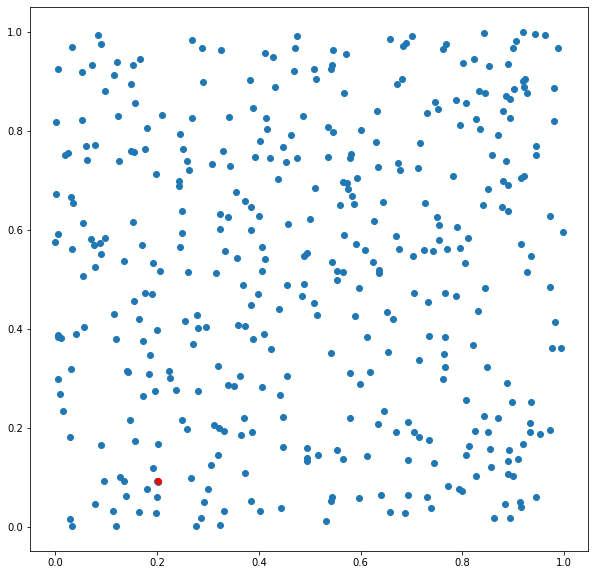

In [100]:
plt.figure(figsize=(10, 10))
plt.scatter(P[0,:], P[1,:])
plt.scatter(P[0,p], P[1,q], color="r")

# The Master Method

Solves for the running time of recurrence relations.

For a recurrence relation,
$$ 
T(n) \leq aT\left(\frac{n}{b}\right) + O(n^d) 
$$

Assuming that the base Case runs in constant time for sufficiently small n
$$ 
T(n) \leq c
$$

Then,
$$
T(n) = 
\begin{cases}
O(n^d\log{n}) & \quad \text{if } a = b^d \\
O(n^d) & \quad \text{if } a < b^d \\
O(n^{\log_b{a}})& \quad \text{if } a > b^d
\end{cases}
$$

Proof

Assume:
1. $T(1) \leq c$
2. $T(n) \leq aT\left(\frac{n}{b}\right) + Cn^d$
3. $\log_b{n} \in \mathbb{Z}$

Consider levels of recurion $j = 0, 1, 2, 3, ...$

At each level, there are 
1. $a^j$ sub problems
2. each problem is size $\frac{n}{b^j}$

Work at level j is less than or equal to 
$$
a^j \times c \times\left(\frac{n}{b^j}\right)^d = cn^d \times \left(\frac{a}{b^d}\right)^j
$$

Then the total work $W$ is bounded by the sum,
$$
W \leq cn^d \times \sum_{j=0}^{\log_b{n}}{\left(\frac{a}{b^d}\right)^j}
$$

This is a geometric sum where 
$$
r = \left(\frac{a}{b^d}\right)^j
$$

This gives us the three conditions,
1. $r = 1$ and the sum 
2. $r < 1$ and the sum "converges"
3. $r > 1$ and the sum "diverges"

Case 1:
$$
W \leq cn^d \times \sum_{j=0}^{\log_b{n}}{1} = cn^d \times \log_b{n} = O(n^d\log_b{n})
$$

Case 2:

We consider what happens to the sum as $n$ grows large. 
$$
\sum_{j=0}^{\log_b{n}}{r} \leq \frac{1}{1-r} = O(1)
$$
Therefore, 
$$
W \leq cn^d \times O(1) = O(cn^d)
$$

Case 3:

We can solve the geometric sum 
$$
\sum_{j=0}^{\log_b{n}}{\left(\frac{a}{b^d}\right)^j}
=\left(\dfrac{a}{b^d}\right)^{\log_b{n}} \times \left(1 + \frac{1}{\left(\dfrac{a}{b^d}\right) -1}\right)
$$
The multiple is a constant term $k$ leaving,
$$
= k \times \left(\dfrac{a}{b^d}\right)^{\log_b{n}}
$$
We need to re-arrange this expression to be in terms on $n$. Let,
$$
I = \left(\dfrac{a}{b^d}\right)^{\log_b{n}} \\

\ln{I} = \log_b{n} \times \ln{\left(\dfrac{a}{b^d}\right)} \\
= \frac{\ln{n}}{\ln{b}} \times (\ln{a} - d\ln{b}) \\
= \ln{n} \times \frac{\ln{a}}{\ln{b}} - d\ln{n} \\
= \ln{\left(n^{\log_b{a}}\right)} - \ln{n^d} \\
$$
This gives,
$$
I = \frac{n^{\log_b{a}}}{n^d}
$$
Completing, 
$$
W \leq = cn^d \times \frac{n^{\log_b{a}}}{n^d} = cn^{\log_b{a}} = O(n^{\log_b{a}})
$$

Since,
$$
n^{\log_b{a}} = a^{\log_b{n}}
$$
This shows that case 3 simply counts the number of final "leaf" nodes in the recursion tree

# Optional Theory Problems

## 1

You are given as input an unsorted array of $n$ distinct numbers, where $n$ is a power of 2. Give an algorithm that identifies the second-largest number in the array, and that uses at most 
$n+\log_2{n}-2$
comparisons.

In [140]:
import random
from typing import Tuple

a = random.sample(range(1, 1000), 2**3)

def tournament(game_state: dict[int, list[int]]) -> Tuple[int, list[int]]:

    while len(game_state.keys()) > 2:
        players = list(game_state.keys())

        for i in range(len(players) // 2):
            if players[2*i] > players[2*i + 1]:
                
                game_state[players[2*i]].append(players[2*i + 1])
                del game_state[players[2*i + 1]]
            else:

                game_state[players[2*i + 1]].append(players[2*i])
                del game_state[players[2*i]]
    else:
        players = list(game_state.keys())

        if players[0] > players[1]:
            return players[0], [*game_state.pop(players[0]), players[1]]
        else:
            return players[1], [*game_state.pop(players[1]), players[0]]

def second_largest(arr: list[int]):
    game_state = {k: [] for k in arr}
    winner, direct_losers = tournament(game_state)

    for i in range(len(direct_losers) -1):
        if direct_losers[i] > direct_losers[i + 1]:
            a = direct_losers[i]
            b = direct_losers[i + 1]

            direct_losers[i] = b
            direct_losers[i + 1] = a

    return direct_losers[-1]

result = second_largest(a) 

print(f'test array: {a}')
print(f'second largest element: {result}')

a.sort()
print(f'{"PASSED" if result == a[-2:-1][0] else "FAILED"}')

test array: [465, 106, 299, 817, 866, 935, 42, 644]
second largest element: 866
PASSED


Run time analysis:

We set up a tournmanet competition such that we end up with the largest element of the array as well as the smaller elements that "lost" to the largest element. This will take 
$$
\frac{n}{2} + \frac{n}{4} + \frac{n}{8} + \cdots + \frac{n}{n} = n - 1
$$
comparisons.

After the tournament the number of losers is at most $\log_2{n}$. Therefore, when we do a bubble sort to get the largest element out of the list of losers, at most
$$
\log_2{n} -1 
$$
comparisons are made, yeilding the required upperbound on comparisons

## 2
You are a given a unimodal array of n distinct elements, meaning that its entries are in increasing order up until its maximum element, after which its elements are in decreasing order. Give an algorithm to compute the maximum element that runs in $O(\log{n})$ time.

In [165]:
import random

inc_len = random.randrange(10)
dec_len = random.randrange(15)

inc_half = random.sample(range(1, 1000), inc_len)
inc_half.sort()

dec_half = random.sample(range(1, 1000), dec_len)
dec_half.sort(reverse=True)

a = [*inc_half, *dec_half]

def max_element(arr: list[int]):
    length = len(arr)
    if length == 1:
        return arr[0]

    cut = len(arr) // 2

    left = arr[:cut]
    right = arr[cut:]

    # increasing case
    if left[-1] < right[0]: 
        return max_element(right)
    # decreasing case
    else: 
        return max_element(left)

result = max_element(a)

print(f'test array: {a}')
print(f'max element: {result}')
a.sort()
print(f'{"PASSED" if result == a[-1] else "FAILED"}')

test array: [192, 334, 369, 389, 478, 499, 851, 991, 864, 812, 609, 46]
max element: 991
PASSED


Run time analysis:

Each recursive call is only made on half of the problem size, and each recursive call only makes one operation. Thus,
$$
T(n) \leq T\left(\frac{n}{2}\right) + O(1)
$$
Which has $O(\log{n})$ running time

## 3

You are given a sorted (from smallest to largest) array A of n distinct integers which can be positive, negative, or zero. You want to decide whether or not there is an index i such that A[i] = i. Design the fastest algorithm that you can for solving this problem.

In [4]:
def find_index_match(a: list[int], index_offset=0):
    if len(a) == 0:
        return False

    check_idx= len(a) // 2
    if a[check_idx] == check_idx + index_offset:
        return True
    elif a[check_idx] > check_idx:
        return find_index_match(a[:check_idx])
    else:
        return find_index_match(a[check_idx:], check_idx)
    
find_index_match([1, 1, 4, 5, 6, 9])

True

Run time analysis:

This runs in $O(\log{n})$ time

## 4

You are given an n by n grid of distinct numbers. A number is a local minimum if it is smaller than all of its neighbors. (A neighbor of a number is one immediately above, below, to the left, or the right. Most numbers have four neighbors; numbers on the side have three; the four corners have two.) Use the divide-and-conquer algorithm design paradigm to compute a local minimum with only $O(n)$ comparisons between pairs of numbers. 

(Note: since there are $n^2$ numbers in the input, you cannot afford to look at all of them. Hint: Think about what types of recurrences would give you the desired upper bound.)

In [9]:
import numpy as np
import random

SIZE = 4
grid = np.array(random.sample(range(1, 1000), SIZE**2)).reshape((SIZE, SIZE))


array([[745, 189, 879, 589],
       [191, 752, 394, 349],
       [518, 431, 759, 235],
       [ 40, 905, 370, 301]])

# Programming Assignment 2

This file contains all of the 100,000 integers between 1 and 100,000 (inclusive) in some order, with no integer repeated.

Your task is to compute the number of inversions in the file given, where the $i^{th}$ row of the file indicates the $i^{th}$ entry of an array.

Because of the large size of this array, you should implement the fast divide-and-conquer algorithm covered in the video lectures.

The numeric answer for the given input file should be typed in the space below.

So if your answer is 1198233847, then just type 1198233847 in the space provided without any space / commas / any other punctuation marks. You can make up to 5 attempts, and we'll use the best one for grading.

(We do not require you to submit your code, so feel free to use any programming language you want --- just type the final numeric answer in the following space.)

[TIP: before submitting, first test the correctness of your program on some small test files or your own devising.  Then post your best test cases to the discussion forums to help your fellow students!]

In [193]:
def inversions(a: list[int]):
    length = len(a)
    if length == 1:
        return a, 0
    
    half = length // 2

    lsorted, lcount = inversions(a[:half])
    rsorted, rcount = inversions(a[half:])
    # print('**')
    # print(lsorted, lcount)
    # print(rsorted, rcount)
    #merge step!
    i = 0
    j = 0
    sortedArr = []
    mcount = 0
    moffset = False
    
    while i < len(lsorted) and j < len(rsorted):
        if moffset:
            mcount += j
            moffset = False

        if lsorted[i] < rsorted[j]:
            sortedArr.append(lsorted[i])
            
            i += 1
            moffset = True

        elif lsorted[i] > rsorted[j]:
            sortedArr.append(rsorted[j])
            mcount += 1
            j += 1

        else:
            sortedArr.append(lsorted[i])
            sortedArr.append(rsorted[j])

            i += 1
            j += 1
    else:
        if j < len(rsorted):
            sortedArr = [*sortedArr, *rsorted[j:]]
        elif i < len(lsorted):
            sortedArr = [*sortedArr, *lsorted[i:]]
            mcount += (len(lsorted) -1 - i)*j
        
    # print(sortedArr, mcount)
    return sortedArr, lcount + rcount + mcount

In [194]:
inversions([3,4,6,1,2,5])[1]

7

In [195]:
inversions([int(x) for x in open(file='Week 2 IntegerArray.txt', mode='r')])[1]

2407905288